In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification

In [3]:
from sklearn.model_selection import train_test_split
x,y = make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)

In [4]:
x.shape,y.shape

((2000, 20), (2000,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
# import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
ytrain_pred = rf.predict_proba(X_train)
print("RF train ROC-AUC:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = rf.predict_proba(X_test)
print("RF test ROC-AUC: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train ROC-AUC:1.0
RF test ROC-AUC: 0.9854666666666667


### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
ytrain_pred = logistic.predict_proba(X_train)
print("RF train ROC-AUC:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = logistic.predict_proba(X_test)
print("RF test ROC-AUC: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train ROC-AUC:0.9863568922694498
RF test ROC-AUC: 0.9885777777777777


### Adaboost Classifier

In [17]:
from sklearn.ensemble import AdaBoostClassifier

In [18]:
adaclass = AdaBoostClassifier()
adaclass.fit(X_train,y_train)
ytrain_pred = adaclass.predict_proba(X_train)
print("RF train ROC-AUC:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = adaclass.predict_proba(X_test)
print("RF test ROC-AUC: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train ROC-AUC:0.9975081174960356
RF test ROC-AUC: 0.9826111111111111


### KNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
ytrain_pred = knn.predict_proba(X_train)
print("RF train ROC-AUC:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
ytest_pred = knn.predict_proba(X_test)
print("RF test ROC-AUC: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

RF train ROC-AUC:0.981670071491109
RF test ROC-AUC: 0.9426111111111111


In [27]:
pred = []

for model in [rf,logistic,adaclass,knn]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble ROC-AUC Curve : {}".format(roc_auc_score(y_test,final_prediction)))

Ensemble ROC-AUC Curve : 0.9853666666666667


In [28]:
final_prediction

0      0.877762
1      0.115823
2      0.826283
3      0.740353
4      0.539947
         ...   
595    0.123840
596    0.115345
597    0.876697
598    0.165717
599    0.837357
Length: 600, dtype: float64

In [29]:
fpr,tpr,thresholds = roc_curve(y_test,final_prediction)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for threshold in thresholds:
    y_pred = np.where(final_prediction>threshold,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls = pd.concat([pd.Series(accuracy_ls),pd.Series(thresholds)],axis=1)
accuracy_ls.columns = ['Accuracy','Threshold']
accuracy_ls.sort_values(by='Accuracy',ascending=False,inplace=True)
accuracy_ls.head()

,Accuracy,Threshold
35,0.961667,0.440449
36,0.960000,0.424603
34,0.960000,0.456693
33,0.958333,0.488669
31,0.958333,0.537196


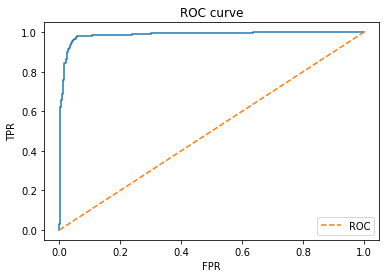

In [41]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--',label='ROC')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.legend()
plt.show()